<a href="https://colab.research.google.com/github/boffandre-cyber/PEE---2025/blob/main/ConversoresEletronicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise e Simulação de Conversores Eletrônicos**
# Grupo # 01 - Guilherme Biazus, Bruno Camargo Gamarra e André Boff
### Conversor - Retificador monofásico (1/2 onda) controlado (a tiristor) alimentando carga resistiva e carga RL.
  
# Trabalho é composto pelas seguintes partes:
1.   Desenvolvimento do circuito elétrico equivalente para análise
e simulação do conversor;
2.   Desenvolvimento analítico das expressões que determinam o modo de
operação do conversor (em regime transitório e de regime);
3. Desenvolvimento de um modelo para simulação computacional do conversor;
4. Comparação dos resultados obtidos de forma analítica e via
simulação.




1. Elaboração dos gráficos Vo, Vlmédio, VlRMS e Plmédia - Carga Resistiva.
2. Adotou-se para elaboração dos gráficos, VoRMS=1, R=1 Ohm e alfa no intervalo [0,pi].





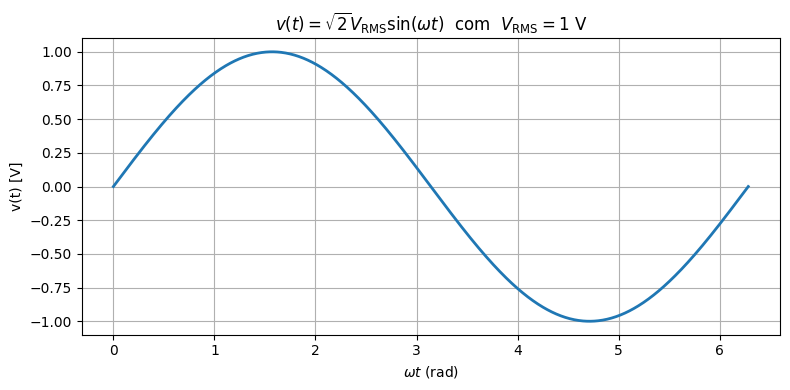

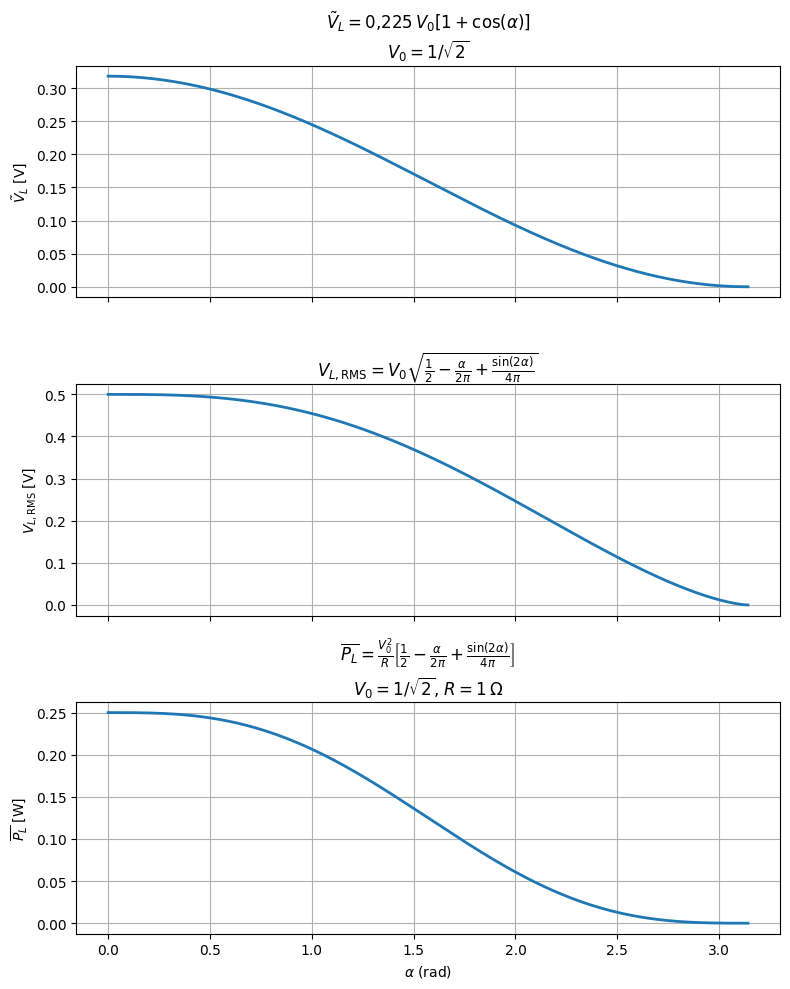

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ============================================================
# Parâmetros gerais
# ============================================================

# Para a função v(t) = sqrt(2)*Vo_rms*sin(wt)
Vo_rms = 1.0/np.sqrt(2)                     # V0_rms = 1 V (valor RMS da tensão)

# Para as funções em função de alpha
Vo = 1/np.sqrt(2)                 # V0 = 1/sqrt(2) V
R = 1.0                           # Resistência em ohms

# Domínios
wt = np.linspace(0, 2*np.pi, 1000)      # wt de 0 a 2π
alpha = np.linspace(0, np.pi, 1000)     # alfa de 0 a π

# ============================================================
# 1) v(t) = sqrt(2)*Vo_rms*sin(wt)
# ============================================================
v_t = np.sqrt(2) * Vo_rms * np.sin(wt)

plt.figure(figsize=(8, 4))
plt.plot(wt, v_t, linewidth=2)
plt.title(r'$v(t) = \sqrt{2}V_{\mathrm{RMS}}\sin(\omega t)$  com  $V_{\mathrm{RMS}} = 1$ V')
plt.xlabel(r'$\omega t$ (rad)')
plt.ylabel('v(t) [V]')
plt.grid(True)
plt.tight_layout()
plt.show()

# ============================================================
# 2) Funções em função de alpha
#    a) Ṽ_L
#    b) V_L,RMS
#    c) P̅_L
# ============================================================

# a) Ṽ_L = 0.225*Vo*(1 + cos(alpha))
Vtil_L = 0.225 * Vo * (1 + np.cos(alpha))

# Termo comum: [1/2 - alpha/(2π) + sin(2alpha)/(4π)]
bracket = 0.5 - alpha/(2*np.pi) + np.sin(2*alpha)/(4*np.pi)

# Corrigir pequenos negativos numéricos (deveriam ser zero)
bracket_clipped = np.clip(bracket, 0, None)

# b) V_L,RMS = Vo*sqrt(bracket)
VL_rms = Vo * np.sqrt(bracket_clipped)

# c) P̅_L = (Vo^2 / R)*bracket
P_L_mean = (Vo**2 / R) * bracket_clipped

# ============================================================
# Gráficos em função de alpha (3 subplots)
# ============================================================
fig, axes = plt.subplots(3, 1, figsize=(8, 10), sharex=True)

# Ṽ_L
axes[0].plot(alpha, Vtil_L, linewidth=2)
axes[0].set_ylabel(r'$\tilde{V}_L$ [V]')
axes[0].set_title(r'$\tilde{V}_L = 0{,}225\,V_0[1+\cos(\alpha)]$'
                  '\n' r'$V_0 = 1/\sqrt{2}$')

axes[0].grid(True)

# V_L,RMS
axes[1].plot(alpha, VL_rms, linewidth=2)
axes[1].set_ylabel(r'$V_{L,\mathrm{RMS}}$ [V]')
axes[1].set_title(
    r'$V_{L,\mathrm{RMS}} = V_0\sqrt{\frac{1}{2} - \frac{\alpha}{2\pi} + \frac{\sin(2\alpha)}{4\pi}}$'
)

axes[1].grid(True)

# P̅_L
axes[2].plot(alpha, P_L_mean, linewidth=2)
axes[2].set_xlabel(r'$\alpha$ (rad)')
axes[2].set_ylabel(r'$\overline{P_L}$ [W]')
axes[2].set_title(
    r'$\overline{P_L} = \frac{V_0^2}{R}\left[\frac{1}{2} - \frac{\alpha}{2\pi} + \frac{\sin(2\alpha)}{4\pi}\right]$'
    '\n' r'$V_0 = 1/\sqrt{2}$, $R = 1\,\Omega$'
)

axes[2].grid(True)

plt.tight_layout()
plt.show()
